This notebook is my answer to the first assignment in the book _A Collection of Data Science Take-Home Challenges_

# Challenge Description

We have data about users who hit our site: whether they converted or not as well as some of
their characteristics such as their country, the marketing channel, their age, whether they are
repeat users and the number of pages visited during that session (as a proxy for site
activity/time spent on site).

Your project is to:
1. Predict conversion rate
2. Come up with recommendations for the product team and the marketing team to improve conversion rate

# Import Data

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [91]:
df = pd.read_csv('conversion_data.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


# Data Understanding

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


There is no missing data in the dataset. All data types make sense.

# Data Exploration

In [93]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [94]:
df.describe(include=['object'])

,country,source
count,316200,316200
unique,4,3
top,US,Seo
freq,178092,155040


Text(0.5, 1.0, 'age bins')

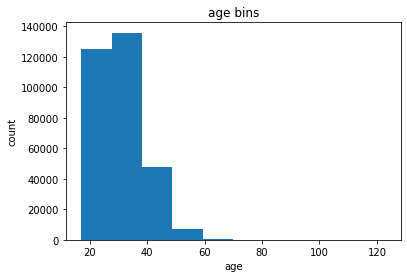

In [95]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df['age'])

plt.pyplot.xlabel("age")
plt.pyplot.ylabel("count")
plt.pyplot.title("age bins")

In [96]:
bins = np.linspace(min(df['age']), max(df['age']),4)
bins

array([ 17.        ,  52.33333333,  87.66666667, 123.        ])

In [97]:
group_names = ['A','B','C']

In [98]:
df['age_binned'] = pd.cut(df['age'], bins, labels = group_names, include_lowest = True)
df[['age','age_binned']].head(20)

,age,age_binned
0,25,A
1,23,A
2,28,A
3,39,A
4,30,A
5,31,A
6,27,A
7,23,A
8,29,A
9,25,A


In [99]:
df[df['age_binned'] == 'C']

,country,age,new_user,source,total_pages_visited,converted,age_binned
90928,Germany,123,0,Seo,15,1,C
295581,UK,111,0,Ads,10,1,C


The age of these two people seems weird.

In [12]:
df.drop(df[df['age_binned'] == 'C'].index, inplace = True)

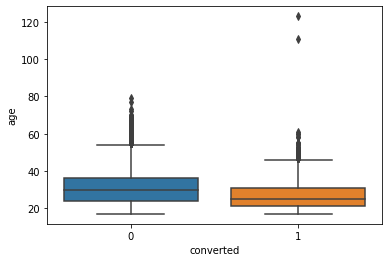

In [100]:
sns.boxplot(x='converted',y='age',data=df)

## No significant difference in age between two groups.

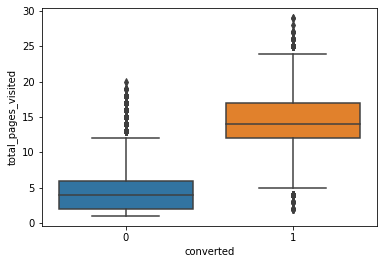

In [101]:
sns.boxplot(x='converted',y='total_pages_visited',data=df)

## Significant difference in pages visited between two groups!!

## Categorical

In [102]:
df_pre_country = df['country'].value_counts().rename_axis('country').reset_index(name='counts')

In [103]:
df_country = df[['country','converted']]
df_country = df_country.groupby(['country'],as_index=False).sum()
df_country['total']=df_pre_country['counts']
df_country['conversion_rate'] = df_country['converted']/df_country['total']
df_country

,country,converted,total,conversion_rate
0,China,102,178092,0.000573
1,Germany,816,76602,0.010652
2,UK,2550,48450,0.052632
3,US,6732,13056,0.515625


### The conversion rate in China is much lower than the others, while the US has the highest conversion rate.

In [104]:
df['new_user'].value_counts()

1    216744
0     99456
Name: new_user, dtype: int64

In [18]:
len(df[df['new_user'] ==1])/len(df)

0.6854692313044358

In [105]:
df_user_type = df[['new_user','converted']]
df_user_type = df_user_type.groupby(['new_user'],as_index=False).sum()
df_user_type['total']=df['new_user'].value_counts()
df_user_type['conversion_rate'] = df_user_type['converted']/df_user_type['total']
df_user_type

,new_user,converted,total,conversion_rate
0,0,7161,99456,0.072002
1,1,3039,216744,0.014021


### Although about 70% of the users are new to the site, the conversion rate for return users are significantly higher. 

In [106]:
df_pre_source = df['source'].value_counts().rename_axis('source').reset_index(name='counts')

In [21]:
df_source = df[['source','converted']]
df_source = df_source.groupby(['source'],as_index=False).sum()
df_source['total'] = df_pre_source['counts']
df_source['conversion_rate'] = df_source['converted']/df_source['total']
df_source

,source,converted,total,conversion_rate
0,Ads,3059,155039,0.019731
1,Direct,2040,88739,0.022989
2,Seo,5099,72420,0.070409


### The conversion rate for users through SEO is much higher.

In [22]:
df_gptest = df[['country','source','converted']]
converted = df_gptest.groupby(['country','source'],as_index=False).sum()
total = df_gptest.groupby(['country','source'],as_index=False).count()
converted['conversion_rate'] = pd.DataFrame(converted['converted']/total['converted'])
converted.drop(['converted'],axis=1,inplace=True)
converted

,country,source,conversion_rate
0,China,Ads,0.001484
1,China,Direct,0.001374
2,China,Seo,0.001224
3,Germany,Ads,0.066755
4,Germany,Direct,0.053422
5,Germany,Seo,0.063909
6,UK,Ads,0.055560
7,UK,Direct,0.046267
8,UK,Seo,0.053905
9,US,Ads,0.040580


In [23]:
grouped_pivot = converted.pivot(index='country',columns='source')
grouped_pivot

conversion_rate                    
source              Ads    Direct       Seo
country                                    
China          0.001484  0.001374  0.001224
Germany        0.066755  0.053422  0.063909
UK             0.055560  0.046267  0.053905
US             0.040580  0.032909  0.038508

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline 

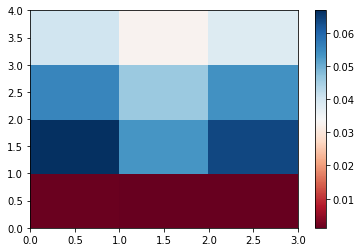

In [25]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

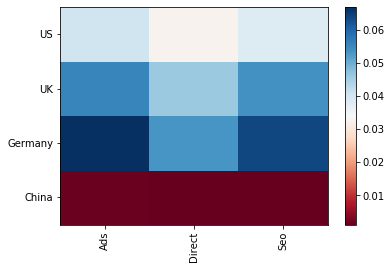

In [26]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### The conversion rates in China through all channels are all low. While Ads and Seo help conversion in US, UK and Germany

In [27]:
df_gptest1 = df[['new_user','source','converted']]
converted1 = df_gptest1.groupby(['new_user','source'],as_index=False).sum()
total1 = df_gptest1.groupby(['new_user','source'],as_index=False).count()
converted1['conversion_rate'] = pd.DataFrame(converted1['converted']/total1['converted'])
converted1.drop(['converted'],axis=1,inplace=True)

In [28]:
cleanup = {'new_user': {0:'return', 1:'new'}}
converted1 = converted1.replace(cleanup)
converted1

,new_user,source,conversion_rate
0,return,Ads,0.078308
1,return,Direct,0.061161
2,return,Seo,0.073395
3,new,Ads,0.014380
4,new,Direct,0.013128
5,new,Seo,0.014234


In [108]:
grouped_pivot1 = converted1.pivot(index='new_user',columns='source')
grouped_pivot1

conversion_rate                    
source               Ads    Direct       Seo
new_user                                    
new             0.014380  0.013128  0.014234
return          0.078308  0.061161  0.073395

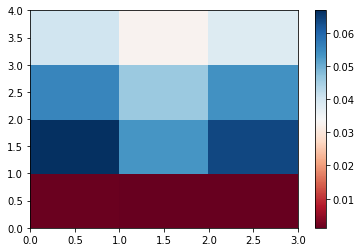

In [119]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

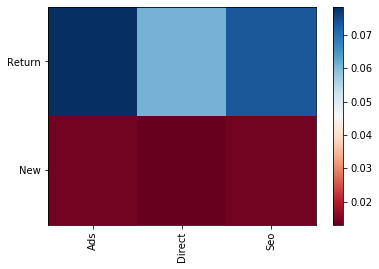

In [120]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot1, cmap='RdBu')

#label names
row_labels = grouped_pivot1.columns.levels[1]
col_labels = ['New','Return']

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot1.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot1.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### The conversion for new users are low for whatever marketing channels. While Ads boost conversion in return users. Usually when people come directly, the conversion is low.

Check Correlation

In [111]:
df.corr()

,age,new_user,total_pages_visited,converted
age,1.000000,0.012343,-0.045922,-0.088797
new_user,0.012343,1.000000,-0.082541,-0.152374
total_pages_visited,-0.045922,-0.082541,1.000000,0.528994
converted,-0.088797,-0.152374,0.528994,1.000000


In [112]:
from scipy import stats

In [113]:
pearson_coef, p_value = stats.pearsonr(df['total_pages_visited'], df['converted'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5289939550188454  with a P-value of P = 0.0


## Since the p-value is <0.001, the correlation between the total pages visited is statistically significant, the linear relationship is strong.

ANOVA

In [114]:
grouped_test1 = converted[['source','conversion_rate']].groupby(['source'])
grouped_test1

In [115]:
grouped_test1.get_group('Ads')['conversion_rate']

0    0.001484
3    0.066755
6    0.055560
9    0.040580
Name: conversion_rate, dtype: float64

In [116]:
f_val, p_val = stats.f_oneway(grouped_test1.get_group('Ads')['conversion_rate'], grouped_test1.get_group('Direct')['conversion_rate'], grouped_test1.get_group('Seo')['conversion_rate'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.09091840674746438 , P = 0.9139200979484235


## There is no significant difference between different source groups.

In [37]:
grouped_test2 = converted[['country','conversion_rate']].groupby(['country'])
grouped_test2

In [38]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('US')['conversion_rate'], grouped_test2.get_group('UK')['conversion_rate'], grouped_test2.get_group('Germany')['conversion_rate'],grouped_test2.get_group('UK')['conversion_rate'], grouped_test2.get_group('China')['conversion_rate'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 73.44794230849594 , P = 2.2552340807215881e-07


## There is significant difference in conversion rate between users with difference nationalities.

In [39]:
grouped_test3 = converted1[['new_user','conversion_rate']].groupby(['new_user'])
grouped_test3

In [40]:
f_val, p_val = stats.f_oneway(grouped_test3.get_group('new')['conversion_rate'], grouped_test3.get_group('return')['conversion_rate'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 124.43423189765183 , P = 0.0003675825237510028


## There is significant difference in conversion rate between new and return users.

### Conclusion: Important variables
Numerical variables:
Total pages visited

Categorical variables:
Country,New_user

# Modeling

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [66]:
dummy_var = pd.get_dummies(df['country'])

In [67]:
df = pd.concat([df,dummy_var],axis=1)
df.drop("country",axis=1,inplace=True)

In [68]:
df

,age,new_user,source,total_pages_visited,converted,China,Germany,UK,US
0,25,1,Ads,1,0,0,0,1,0
1,23,1,Seo,5,0,0,0,0,1
2,28,1,Seo,4,0,0,0,0,1
3,39,1,Seo,5,0,1,0,0,0
4,30,1,Seo,6,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
316195,26,1,Ads,9,0,0,0,0,1
316196,27,1,Direct,6,0,0,0,0,1
316197,25,0,Ads,4,0,1,0,0,0
316198,22,0,Seo,4,0,0,0,0,1


In [71]:
Z = df[['new_user','total_pages_visited','China','Germany','UK','US']]
y = df['converted']

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [79]:
logreg.coef_

array([[-1.66861607,  0.75823326, -2.70798083,  1.19858022,  0.9397263 ,
         0.57160923]])

In [80]:
logreg.intercept_

array([-9.87858709])

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
y_data = df['converted']
x_data = df.drop('converted',axis=1)

In [88]:
Rcross = cross_val_score(logreg, Z, y, cv=4)

In [89]:
Rcross

array([0.98521189, 0.98573055, 0.98567995, 0.9857179 ])

# Next steps

I have the following sugguesions for the product and marketing team:
1. Invest more money into Ads as it has the greatest impact on the conversion of return users and western users.
2. Increase the engagement of website to interact with users more as the more pages users view, the more likely they make purchase.
3. China is an emerging market that currently we perform poorly in conversion. None of the current marketing channels work. Think of other ways like creating social buzz first to open the market.